## This will be an analysis of a single company.
#### I will reproduce this for additional companies, for further analysis.

Just loading the packages.

In [1]:
import csv
import numpy as np
import math as ma
import pandas as pd
import plotly.express as px
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import chart_studio

from statsmodels.graphics.gofplots import qqplot

from scipy import stats
import matplotlib.pyplot as plt

import yfinance as yf
import datetime

Loading the relevant CSV as dataframes.

In [2]:
main_df = pd.read_csv(r'Data/vg_complete_df.csv')
vg_comp_stock = pd.read_csv(r'Data/VG_Stocks.csv')

Filtering based on what I am looking for.

In [46]:
game_co = "Square Enix"
vg_df = main_df[(main_df['company'] == "Square Enix")]
stock = yf.Ticker('9684.T')

In [47]:

vg_df = vg_df[(vg_df['release_date_x'] > '1999-01-01')]
vg_df = vg_df[(vg_df['release_date_x'] < '2017-01-01')]



stock = stock.history(start= '1999-01-01', end = '2018-01-01')
stock.reset_index(inplace=True)

In [11]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 23 to 4438
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             254 non-null    object 
 1   console           254 non-null    object 
 2   genre_x           254 non-null    object 
 3   publisher         254 non-null    object 
 4   developer_x       254 non-null    object 
 5   critic_score      254 non-null    float64
 6   total_sales       254 non-null    float64
 7   release_date_x    254 non-null    object 
 8   NA_Sales          254 non-null    float64
 9   EU_Sales          254 non-null    float64
 10  JP_Sales          254 non-null    float64
 11  Other_Sales       254 non-null    float64
 12  Global_Sales      254 non-null    float64
 13  Critic_Count      254 non-null    float64
 14  User_Count        254 non-null    float64
 15  Rating            254 non-null    object 
 16  positive_critics  28 non-null     float64


A first look at the scores for genres. See if the company has any games that are significantly better than others. Though the numbers on this could be skewed because one game can come out on multiple platforms.

In [12]:
group = vg_df.groupby(['genre_x'])
group.agg(['mean', 'std', 'count'])['critic_score']

mean        std  count
genre_x                                      
Action            76.921569   9.967634     51
Action-Adventure  70.555556  11.663095      9
Adventure         76.190476   8.170796     21
Fighting          66.000000  15.700318      5
Misc              66.142857   9.136531      7
Music             83.000000        NaN      1
Platform          64.666667   9.073772      3
Puzzle            59.200000   9.418068      5
Racing            60.400000   5.458938      5
Role-Playing      77.136364   9.865978     88
Shooter           68.560976  15.879309     41
Simulation        66.000000   1.414214      2
Sports            60.500000  16.263456      2
Strategy          73.285714   4.339950     14

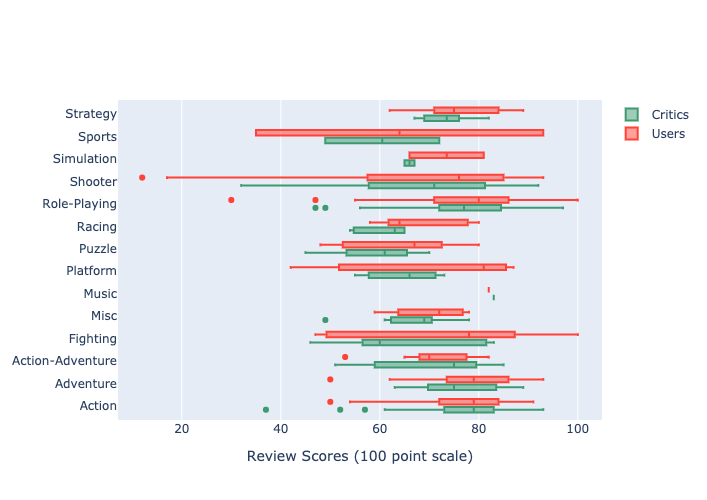

In [13]:
fig = go.Figure()
fig.add_trace(go.Box(
    x=vg_df['critic_score'],
    y=vg_df['genre_x'],
    name='Critics',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    x=vg_df['user_score'],
    y=vg_df['genre_x'],
    name='Users',
    marker_color='#FF4136'
))

fig.update_layout(
    xaxis=dict(title='Review Scores (100 point scale)', zeroline=False),
    boxmode='group', height=500
)

fig.update_traces(orientation='h') # horizontal box plots
fig.show()

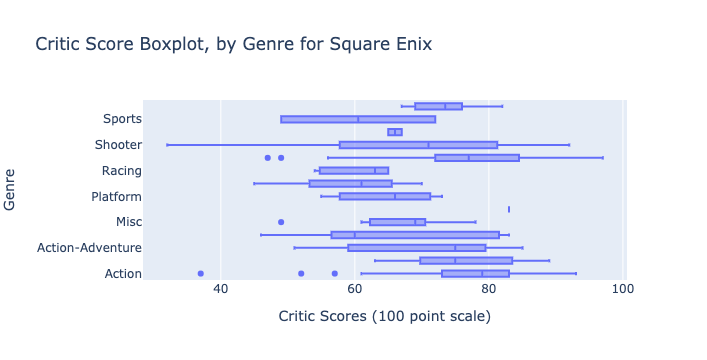

In [14]:
comp_crit = px.box(vg_df, y="genre_x", x="critic_score",
                labels={
                    
                     "critic_score": "Critic Scores (100 point scale)",
                     "genre_x": "Genre"
                 },
                title=(f"Critic Score Boxplot, by Genre for {game_co}"))
comp_crit.show()

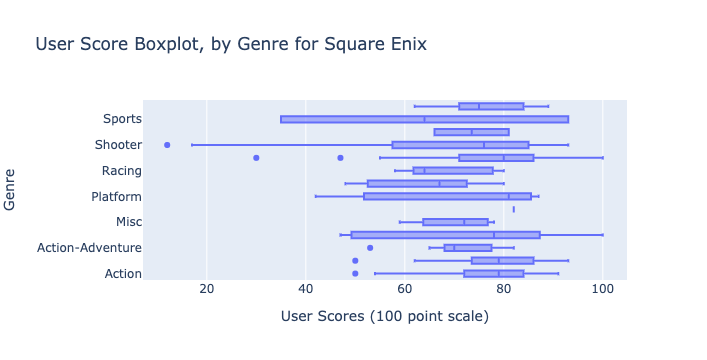

In [15]:
comp_crit = px.box(vg_df, y="genre_x", x="user_score",
                labels={
                    
                     "user_score": "User Scores (100 point scale)",
                     "genre_x": "Genre"
                 },
                title=(f"User Score Boxplot, by Genre for {game_co}"))
comp_crit.show()

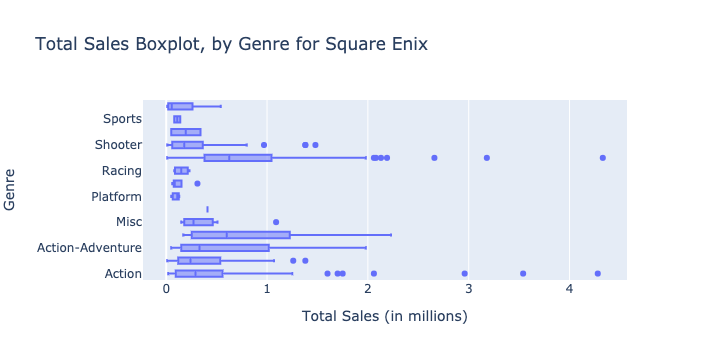

In [16]:
no_out_sales = vg_df[((vg_df.total_sales - vg_df.total_sales.mean()) / vg_df.total_sales.std()).abs() < 3]
comp_crit = px.box(no_out_sales, y="genre_x", x="total_sales",
                labels={
                    
                     "genre_x": "Genre",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"Total Sales Boxplot, by Genre for {game_co}"))
comp_crit.show()

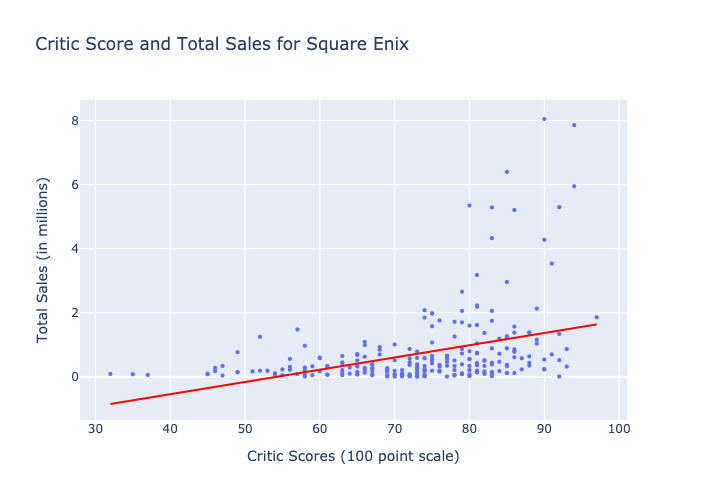

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     39.92
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.19e-09
Time:                        22:37:06   Log-Likelihood:                -390.51
No. Observations:                 254   AIC:                             785.0
Df Residuals:                     252   BIC:                             792.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0721      0.451     -4.592      0.0

In [17]:

fig = px.scatter(vg_df, x="critic_score", y="total_sales", 
                 trendline="ols", trendline_color_override="red", height = 500,
                labels={
                    
                     "critic_score": "Critic Scores (100 point scale)",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"Critic Score and Total Sales for {game_co}")
)

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.show()

results = px.get_trendline_results(fig)
result = results.iloc[0]["px_fit_results"].summary()
print(result)

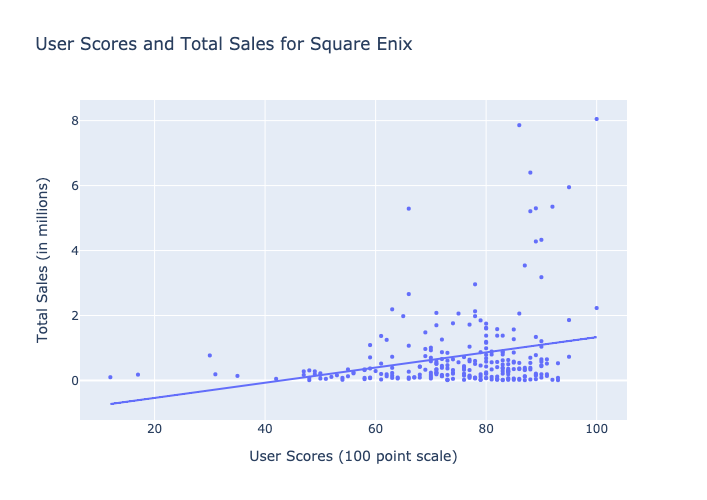

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     18.69
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           2.22e-05
Time:                        22:37:06   Log-Likelihood:                -400.10
No. Observations:                 254   AIC:                             804.2
Df Residuals:                     252   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0053      0.411     -2.445      0.0

In [18]:

fig = px.scatter(vg_df, x="user_score", y="total_sales", 
                 trendline="ols", height = 500,
                labels={
                    
                     "user_score": "User Scores (100 point scale)",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"User Scores and Total Sales for {game_co}"))

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.show()

results = px.get_trendline_results(fig)
result = results.iloc[0]["px_fit_results"].summary()
print(result)

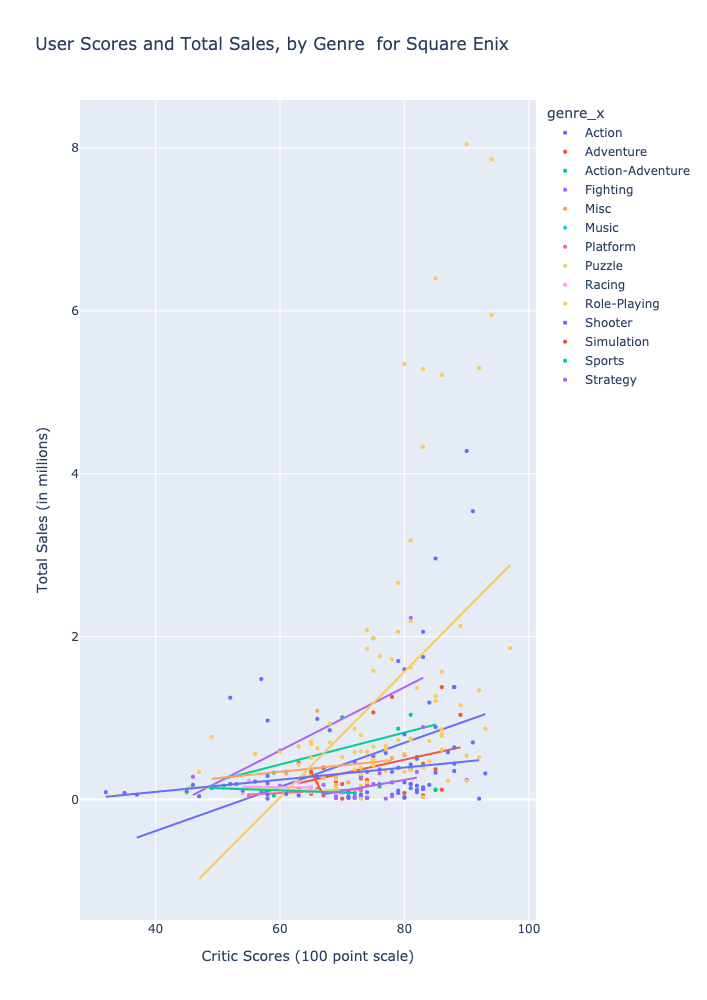

In [19]:

fig = px.scatter(vg_df, x="critic_score", y="total_sales", 
                 color="genre_x", trendline="ols", width= 1000, height = 1000,
                                labels={
                    
                     "critic_score": "Critic Scores (100 point scale)",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"User Scores and Total Sales, by Genre  for {game_co}"))


fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.show()

results = px.get_trendline_results(fig)
#print(results)


In [20]:
for i in range(len(results)):
    print('_'*80)
    print('='*80 + '\n')
    print('\033[1m' + '#'* 5 + ' ' * 5 + results.iloc[i, 0] +  ' ' * 5 + '#'*5 + '\033[0m')
    result = results.iloc[i]["px_fit_results"].summary()
    print(result)

# #print(results.genre_x[1])

# # rest = results.reset_index()
# results.iloc[1, 0]

#len(results)

________________________________________________________________________________

#####     Action     #####
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     4.734
Date:                Sun, 25 Jul 2021   Prob (F-statistic):             0.0344
Time:                        22:37:07   Log-Likelihood:                -64.678
No. Observations:                  51   AIC:                             133.4
Df Residuals:                      49   BIC:                             137.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: Va

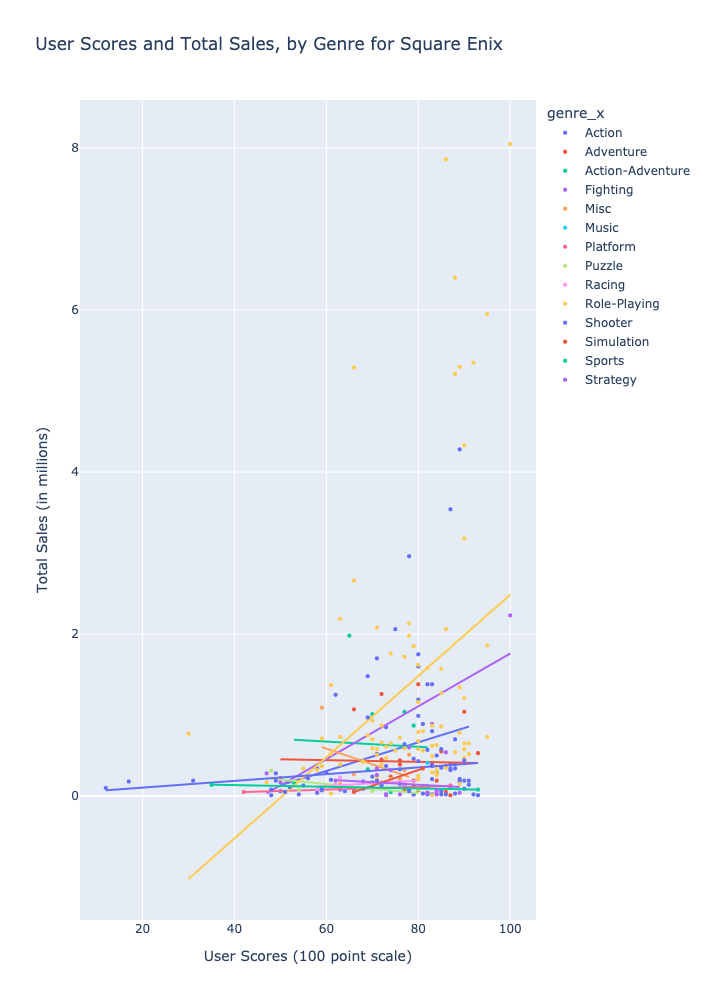

In [21]:

fig = px.scatter(vg_df, x="user_score", y="total_sales", 
                 color="genre_x", trendline="ols", height = 1000,
                                labels={
                    
                     "user_score": "User Scores (100 point scale)",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"User Scores and Total Sales, by Genre for {game_co}"))

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.show()

results = px.get_trendline_results(fig)
# print(results)


In [22]:
for i in range(len(results)):
    print('_'*80)
    print('='*80 + '\n')
    print('\033[1m' + '#'* 5 + ' ' * 5 + results.iloc[i, 0] +  ' ' * 5 + '#'*5 + '\033[0m')
    result = results.iloc[i]["px_fit_results"].summary()
    print(result)
    

________________________________________________________________________________

#####     Action     #####
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.877
Date:                Sun, 25 Jul 2021   Prob (F-statistic):              0.177
Time:                        22:37:09   Log-Likelihood:                -66.071
No. Observations:                  51   AIC:                             136.1
Df Residuals:                      49   BIC:                             140.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: Va

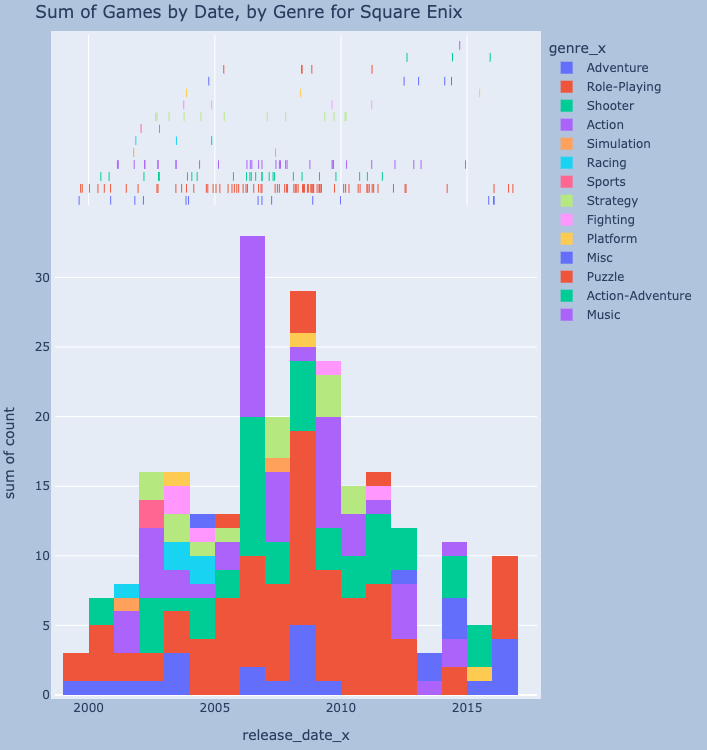

In [23]:
group_date_gen = vg_df.groupby(['release_date_x', 'genre_x'])
rls_dt_genre_ct = group_date_gen.agg(['count'])['title'].reset_index()



fig = px.histogram(rls_dt_genre_ct, x="release_date_x", y='count',
                   color="genre_x", marginal="rug", 
                   labels={
                   "release_data_x": "Date"
                 },
                title=(f"Sum of Games by Date, by Genre for {game_co}"))
fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=35,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

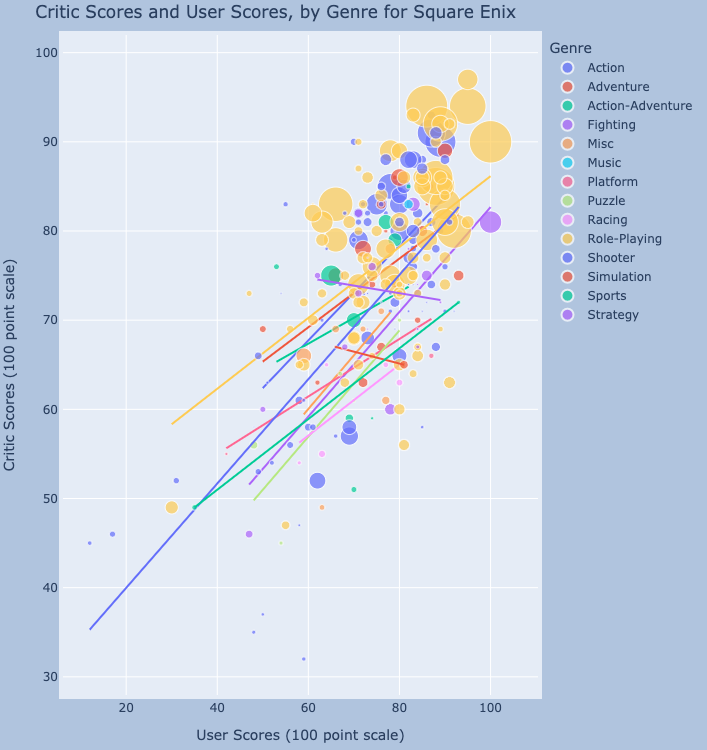

In [24]:
#fig = px.scatter(vg_df.query("total_sales > 1"),
fig = px.scatter(vg_df,                 
        x="user_score", y="critic_score",
        size="total_sales", color="genre_x",
        hover_name="title", log_x=False, trendline="ols", size_max=30,
    labels={
        "user_score": "User Scores (100 point scale)",               
        "critic_score": "Critic Scores (100 point scale)",
        "genre_x": "Genre"
    },    title=(f"Critic Scores and User Scores, by Genre for {game_co}"))

fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=35,
        pad=4
    ),

    paper_bgcolor="LightSteelBlue"
)


fig.show()

In [25]:
vg_df_series = vg_df.copy()

aggregation_functions = {'company' : 'first', 'stock' : 'first', 'console': lambda x: ', '.join(x), 
                        'genre_x': 'first',  
                        'critic_score': 'mean', 'total_sales': 'sum',
                        'user_score': 'mean'}
vg_df_series = vg_df_series.groupby(['title', 'release_date_x']).aggregate(aggregation_functions)
vg_df_series.reset_index(inplace=True)
vg_df_series

title release_date_x  \
0                                          Arkanoid DS     2008-06-17   
1                                   Army Corps of Hell     2012-02-22   
2    Backyard Wrestling 2: There Goes the Neighborhood     2004-11-16   
3           Backyard Wrestling: Don't Try This at Home     2003-10-07   
4           Backyard Wrestling: Don't Try This at Home     2003-10-09   
..                                                 ...            ...   
184                       Valkyrie Profile 2: Silmeria     2006-09-26   
185            Valkyrie Profile: Covenant of the Plume     2009-03-16   
186                          Valkyrie Profile: Lenneth     2006-07-18   
187                                           Whiplash     2003-11-18   
188                             World of Final Fantasy     2016-10-25   

         company  stock   console       genre_x  critic_score  total_sales  \
0    Square Enix  SQNXF        DS        Puzzle          61.0         0.06   
1    Square Enix  SQNXF       PSV        Action          57.0         0.09   
2    Square Enix  SQNXF       PS2      Fighting          46.0         0.28   
3    Square Enix  SQNXF       PS2      Fighting          60.0         0.60   
4    Square Enix  SQNXF        XB      Fighting          60.0         0.17   
..           ...    ...       ...           ...           ...          ...   
184  Square Enix  SQNXF       PS2  Role-Playing          84.0         0.47   
185  Square Enix  SQNXF        DS  Role-Playing          75.0         0.42   
186  Square Enix  SQNXF       PSP  Role-Playing          81.0         0.36   
187  Square Enix  SQNXF       PS2      Platform          66.0         0.13   
188  Square Enix  SQNXF  PS4, PSV  Role-Playing          77.0         0.97   

     user_score  
0          70.0  
1          66.0  
2          47.0  
3          78.0  
4          50.0  
..          ...  
184        90.0  
185        68.0  
186        84.0  
187        87.0  
188        84.5  

[189 rows x 9 columns]

In [26]:
vg_df_series['release_date_x']= pd.to_datetime(vg_df_series['release_date_x'])
vg_df_series = vg_df_series.rename(columns = {"release_date_x":"release_date"})
vg_df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         189 non-null    object        
 1   release_date  189 non-null    datetime64[ns]
 2   company       189 non-null    object        
 3   stock         189 non-null    object        
 4   console       189 non-null    object        
 5   genre_x       189 non-null    object        
 6   critic_score  189 non-null    float64       
 7   total_sales   189 non-null    float64       
 8   user_score    189 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 13.4+ KB


In [49]:
vg_df_series = vg_df_series[(vg_df_series['release_date'] > '2001-01-04')]
stock = stock.merge(vg_df_series[['title', 'critic_score', 'total_sales', 'release_date', 'user_score']], how = 'left',
                left_on = 'Date', right_on = 'release_date')


In [50]:
stock

Date         Open         High          Low        Close  Volume  \
0    2001-01-04  1514.661709  1539.822234  1484.469116  1484.469116   23550   
1    2001-01-05  1464.340424  1507.113223  1459.308357  1486.984863   37200   
2    2001-01-08  1486.984863  1486.984863  1486.984863  1486.984863       0   
3    2001-01-09  1469.372585  1486.984959  1408.987409  1419.051636   43050   
4    2001-01-10  1416.535505  1436.663958  1408.987358  1426.599731   52500   
...         ...          ...          ...          ...          ...     ...   
4242 2017-12-26  5354.533543  5373.794455  5306.381263  5316.011719  156700   
4243 2017-12-27  5316.011975  5344.903344  5287.120605  5287.120605  262700   
4244 2017-12-28  5267.859976  5287.120890  5181.185863  5200.446777  632400   
4245 2017-12-29  5200.446632  5219.707545  5133.033435  5161.924805  634000   
4246 2018-01-01  5161.924805  5161.924805  5161.924805  5161.924805       0   

      Dividends  Stock Splits title  critic_score  total_sales release_date  \
0           0.0           0.0   NaN           NaN          NaN          NaT   
1           0.0           0.0   NaN           NaN          NaN          NaT   
2           0.0           0.0   NaN           NaN          NaN          NaT   
3           0.0           0.0   NaN           NaN          NaN          NaT   
4           0.0           0.0   NaN           NaN          NaN          NaT   
...         ...           ...   ...           ...          ...          ...   
4242        0.0           0.0   NaN           NaN          NaN          NaT   
4243        0.0           0.0   NaN           NaN          NaN          NaT   
4244        0.0           0.0   NaN           NaN          NaN          NaT   
4245        0.0           0.0   NaN           NaN          NaN          NaT   
4246        0.0           0.0   NaN           NaN          NaN          NaT   

      user_score  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
4242         NaN  
4243         NaN  
4244         NaN  
4245         NaN  
4246         NaN  

[4247 rows x 13 columns]

In [51]:
vg_df_series_sales = vg_df_series[vg_df_series['total_sales'] > 1].sort_values(by="critic_score", ascending=False)
top10_vg_series = vg_df_series_sales.head(10)
bot10_vg_series = vg_df_series_sales.tail(10)

In [52]:
# vg_df_series_sales = vg_df_series[vg_df_series['total_sales'] > 1].sort_values(by="total_sales", ascending=False)
# top10_vg_sales = vg_df_series_sales.head(10)
# bot10_vg_sales = vg_df_series_sales.tail(10)

In [53]:
vg_df_series_85 = vg_df_series[vg_df_series['critic_score'] > 85]
vg_df_series_70 = vg_df_series[vg_df_series['critic_score'] < 70]

In [54]:
stock = stock.merge(vg_df_series_90[['title', 'critic_score', 'total_sales', 'release_date', 'user_score']], how = 'left',
                left_on = 'Date', right_on = 'release_date')

NameError: name 'vg_df_series_90' is not defined

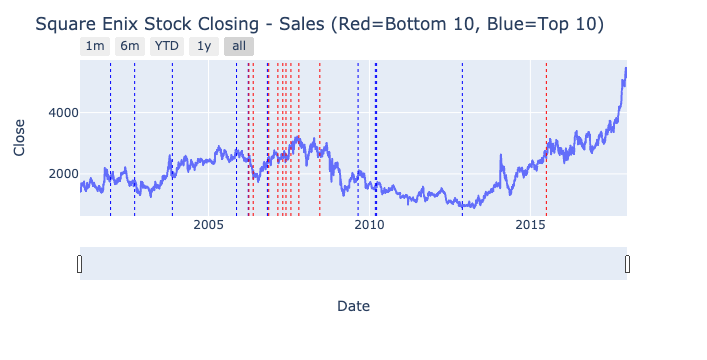

                                             title release_date  \
67                                 Final Fantasy X   2001-12-17   
5                            Batman: Arkham Asylum   2009-08-25   
75                              Final Fantasy XIII   2010-03-09   
99                                  Kingdom Hearts   2002-09-16   
73                               Final Fantasy XII   2006-10-31   
69                               Final Fantasy X-2   2003-11-18   
41   Dragon Quest VIII: Journey of the Cursed King   2005-11-15   
102                              Kingdom Hearts II   2006-03-28   
90                              Hitman: Absolution   2012-11-20   
97                                    Just Cause 2   2010-03-23   

           console  total_sales  critic_score  
67             PS2         8.05     90.000000  
5        PS3, X360         7.82     90.500000  
75       PS3, X360         7.54     80.500000  
99             PS2         6.40     85.000000  
73             PS2    

In [55]:
vg_df_series_sales = vg_df_series[vg_df_series['console'] != "PC"].sort_values(by="total_sales", ascending=False)
top10_vg_sales = vg_df_series_sales.head(10)
bot10_vg_sales = vg_df_series_sales.tail(10)


fig = go.Figure()

fig = px.line(stock, x="Date", y="Close")
# for col in cols:
#     fig.add_trace(go.Scatter(
#         x=stock['Date'],
#         y=stock['Close'],
# #         name=col
#     ))


for index, row in top10_vg_sales.dropna(subset=['title']).iterrows():
    fig.add_shape(
        type='line',
        x0=row['release_date'],
        y0=0,
        x1=row['release_date'],
        y1=1,
        yref='paper',
        line=dict(
            color="blue",
            width=1,
            dash="dot",
        )
    )
    
for index, row in bot10_vg_sales.dropna(subset=['title']).iterrows():
    fig.add_shape(
        type='line',
        x0=row['release_date'],
        y0=0,
        x1=row['release_date'],
        y1=1,
        yref='paper',
        line=dict(
            color="red",
            width=1,
            dash="dot"#,
 #           hover_name="Title"
        )
    )

#fig.update_traces(mode="markers+lines", hovertemplate=None)    
    
    
#     fig.add_annotation(
#         x=row['release_date'], 
#         y='critic_score',
#         text=row['title'],
#             showarrow=True,
#             arrowhead=4,
#             )

fig.update_layout(
    title=(f"{game_co} Stock Closing - Sales (Red=Bottom 10, Blue=Top 10)"),
)


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()


print(top10_vg_sales[['title', 'release_date', 'console', 'total_sales', 'critic_score']])
print(bot10_vg_sales[['title', 'release_date', 'console', 'total_sales', 'critic_score']])

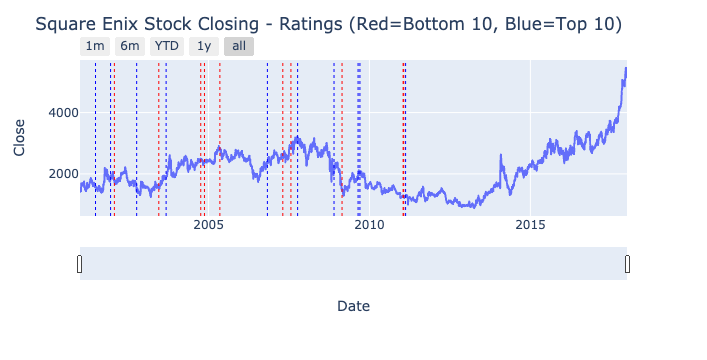

                                           title release_date    console  \
73                             Final Fantasy XII   2006-10-31        PS2   
6                          Batman: Arkham Asylum   2009-09-15         PC   
17                                Chrono Trigger   2008-11-25         DS   
50                      Final Fantasy Chronicles   2001-06-29         PS   
167                              TimeSplitters 2   2002-10-09        PS2   
5                          Batman: Arkham Asylum   2009-08-25  PS3, X360   
67                               Final Fantasy X   2001-12-17        PS2   
153          Tactics Ogre: Let Us Cling Together   2011-02-15        PSP   
65   Final Fantasy Tactics: The War of the Lions   2007-10-09        PSP   
64                 Final Fantasy Tactics Advance   2003-09-08        GBA   

     total_sales  critic_score  
73          5.95          94.0  
6           0.32          93.0  
17          1.34          92.0  
50          0.52          92.0 

In [56]:
vg_df_series_rated = vg_df_series.sort_values(by="critic_score", ascending=False)
top10_vg_rated = vg_df_series_rated.head(10)
bot10_vg_rated = vg_df_series_rated.tail(10)

fig = go.Figure()

fig = px.line(stock, x="Date", y="Close")
# for col in cols:
#     fig.add_trace(go.Scatter(
#         x=stock['Date'],
#         y=stock['Close'],
# #         name=col
#     ))


for index, row in top10_vg_rated.dropna(subset=['title']).iterrows():
    fig.add_shape(
        type='line',
        x0=row['release_date'],
        y0=0,
        x1=row['release_date'],
        y1=1,
        yref='paper',
        line=dict(
            color="blue",
            width=1,
            dash="dot",
        )
    )
    
for index, row in bot10_vg_rated.dropna(subset=['title']).iterrows():
    fig.add_shape(
        type='line',
        x0=row['release_date'],
        y0=0,
        x1=row['release_date'],
        y1=1,
        yref='paper',
        line=dict(
            color="red",
            width=1,
            dash="dot"#,
 #           hover_name="Title"
        )
    )

#fig.update_traces(mode="markers+lines", hovertemplate=None)    
    
    
#     fig.add_annotation(
#         x=row['release_date'], 
#         y='critic_score',
#         text=row['title'],
#             showarrow=True,
#             arrowhead=4,
#             )
fig.update_layout(
    title=(f"{game_co} Stock Closing - Ratings (Red=Bottom 10, Blue=Top 10)"),
)


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()


print(top10_vg_rated[['title', 'release_date', 'console', 'total_sales', 'critic_score']])
print(bot10_vg_rated[['title', 'release_date', 'console', 'total_sales', 'critic_score']])

In [56]:
# pd.DataFrame(vg_df_series_85).to_csv(r'Dash/vg_df_series_85.csv')
# pd.DataFrame(vg_df_series_70).to_csv(r'Dash/vg_df_series_70.csv')

Empty DataFrame
Columns: [title, release_date, company, stock, console, genre_x, critic_score, total_sales, user_score]
Index: []